In [1]:
import sys
!{sys.executable} -m pip install uncertainties

     |████████████████████████████████| 98 kB 5.1 MB/s eta 0:00:011
     |████████████████████████████████| 491 kB 57.5 MB/s eta 0:00:01


In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import xarray as xr
import scipy as sp
#import cartopy.crs as ccrs 
#import cartopy.feature as cfeature
import seaborn as sns
from affine import Affine
#import rioxarray
import datetime as dt
#import datetime
# import glob
#from datetime import timedelta
#from dateutil.relativedelta import relativedelta  
#from datetime import date
import os
from uncertainties import ufloat
from scipy import stats as st
#import shutil



In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=UserWarning)



## Finding the Seasons

In [3]:
# def return_seasons():
#     d0 = date(2000, 1, 1)
#     Q = 0
#     Seasons = pd.DataFrame()
#     A = xr.open_dataset('./Phenology.nc')
#     LC = xr.open_dataarray('./LCC_new1.nc')
#     Inc = A.Cycle_1_Increase
#     Max = A.Cycle_1_Maximum
#     Dec = A.Cycle_1_Decrease
#     Min = A.Cycle_1_Minimum
#     first = Inc.to_dataframe('Cycle_1_Increase')
#     second = Max.to_dataframe('Cycle_1_Maximum')
#     third = Dec.to_dataframe('Cycle_1_Decrease')
#     fourth = Min.to_dataframe('Cycle_1_Minimum')
#     fin  = pd.concat([first,second, third,fourth], axis=1)
    
    

#     fin = fin.dropna(axis=0, how='any')
#     print(fin)
#     input()
#     for index, row in fin.iterrows():

#         sp = row['Cycle_1_Increase']
#         su = row['Cycle_1_Maximum']
#         fa = row['Cycle_1_Decrease']
#         wi = row['Cycle_1_Minimum']
#         print(row)
#         input()

        
#         if (sp > 0 and su > 0 and fa > 0 and wi > 0):
#                     # print(sp)
#                     sp_d = d0 + datetime.timedelta(days=int(sp))
#                     su_d = d0 + datetime.timedelta(days=int(su))
#                     fa_d = d0 + datetime.timedelta(days=int(fa))
#                     wi_d = d0 + datetime.timedelta(days=int(wi))
                    
#                     if sp_d.month == su_d.month or su_d.month == fa_d.month or fa_d.month == wi_d.month or sp_d.month == wi_d.month or su_d.month == wi_d.month or sp_d.month == fa_d.month:
#                         continue
#                     # if su_d.month - fa_d.month < 2 or su_d.month - fa_d.month == 11:
#                         # continue

#                     df = {'SS': [sp_d.month, su_d.month, fa_d.month, wi_d.month]}
#                     Seasons = Seasons.append(df, ignore_index = True)
#                     Q = Q+ 1
#     # print(Seasons)
#     # input()

#     A = Seasons['SS']
#     C = np.unique(A, return_counts=True)
#     temp = C[0][np.argmax(C[1])]

#     year = 2020
#     spring = datetime.datetime(year, temp[0], 1) 

#     if temp[1] < temp[0]:
#         year = 2021
#     summer = datetime.datetime(year, temp[1], 1)
#     sp_e = summer - timedelta(days = 1)
    
#     if temp[2] < temp[1]:
#         year = 2021
#     fall = datetime.datetime(year, temp[2], 1)
#     su_e = fall - timedelta(days = 1)
    
#     if temp[3] < temp[2]:
#         year = 2021
#     winter = datetime.datetime(year, temp[3], 1)
#     fa_e = winter - timedelta(days = 1)

#     new = spring + relativedelta(years = 1)
#     wi_e = new - timedelta(days = 1)

#     spring = pd.date_range(spring,sp_e, freq='MS').strftime("%m").tolist()
#     spring = [int(i) for i in spring]
#     summer = pd.date_range(summer,su_e, freq='MS').strftime("%m").tolist()
#     summer = [int(i) for i in summer]
#     fall = pd.date_range(fall,fa_e, freq='MS').strftime("%m").tolist()
#     fall = [int(i) for i in fall]
#     winter = pd.date_range(winter,wi_e, freq='MS').strftime("%m").tolist()
#     winter = [int(i) for i in winter]
#     return spring, summer, fall, winter
#     # if season == 'spring':
#     #     return spring
#     # if season == 'summer':
#     #     return summer
#     # if season == 'fall':
#     #     return fall
#     # if season == 'winter':
#     #     return winter

In [350]:
# Forest_Phen = pd.read_csv('Forest_Phen.csv', index_col=0)
# Grass_Phen = pd.read_csv('Grass_Phen.csv', index_col=0)
# Forest_Phen

In [4]:
Region_S = pd.read_csv('./../data/Region_Periods.csv', index_col=0)
# Region_S

## Slope For each grid cell

In [21]:
# def land_slope(Array, period):
#     #dur dependent on freq: 31 for one month, 372 for all months
#     dur = 372
#     List = ['DJF','MAM','JJA','SON']
#     # if period == 'Y':
#     #     Set = Array
#     # elif period in List:
#     #     Set = Array[Array['time.season']==period]
#     #     Set = Set.groupby(Set['time.year']).mean(dim = ['time'], skipna=True)
#     # else:
#     # if period == 'Growing':
#     #     Set = Array[Array['time.season']==period]
#     #     Set = Set.groupby(Set['time.year']).mean(dim = ['time'], skipna=True)
#     # elif period == 'Dormant':
        
#     if period == 'Annual':

#         Set = Array.groupby(Array['time.year']).mean(dim = ['time'], skipna=True)
#     else: 
#         Set = Array.sel(time=Array.time.dt.month.isin(period))
#         Set = Set.groupby(Set['time.year']).mean(dim = ['time'], skipna=True)

    
#     reg_results = np.empty([len(Array.latitude),len(Array.longitude)])

#     for x in range(len(Array.latitude)):
#         # if x%50 == 0:
#         #     print(x)
#         for y in range(len(Array.longitude)):
#             # print(type(Set.data[:,x,y]))
#             # input()
#             slope, intercept, lo_value, up_value = sp.stats.mstats.theilslopes(Set.data[:,x,y])
#             #if p_value/2 <= 0.05:
#             reg_results[x,y] = slope

    
#     Array_slope = xr.Dataset(
#     {"slopes":  (("latitude", "longitude"), reg_results)},
#     coords={
#         "latitude": Set.latitude,
#         "longitude": Set.longitude,
#     },
#     attrs=Set.attrs ,
#     )
#     return Array_slope



## Dataframe of each region

In [22]:
# def region_trend(Region, season): 
#     Flag = 1
#     #Create Initial Data
#     Reg_temp = xr.open_dataarray('./Regions/Div_temp/' + Region)
#     # print(Reg_temp)
#     # input()
#     Reg_temp = Reg_temp[144:-6]
#     # temp = Regx_temp.mean(axis=0, skipna=True)
#     Reg_prec = xr.open_dataarray('./Regions/Div_precip/' + Region)
#     # precip = Reg_precip.mean(axis=0, skipna=True)
#     elev = xr.open_dataarray('./Regions/Div_el/' + Region)
#     LC = xr.open_dataarray('./Regions/Div_Lc/' + Region)
#     Aridity = xr.open_dataarray('./Regions/Aridity/' + Region)
#     # LC = LC.mean(axis = 0, skipna = True)
#     # if land == 'Forests':
#     #     Region_S = Forest_Phen
#     # else:
#     #     Region_S = Grass_Phen
#     if season == 'Annual':
#         select = range(1,13)
#     elif season == 'Growing':
#         sel = Region_S[Region_S['Name'] == Region]
#         select1 = sel['Greenup'].values[0][1:-1].split(',')
#         select1 = [int(i) for i in select1]
#         select2 = sel['Maturity'].values[0][1:-1].split(',')
#         select2 = [int(i) for i in select2]
#         select = select1 + select2

#     elif season == 'Dormant':
#         sel = Region_S[Region_S['Name'] == Region]
#         select1 = sel['Senescence'].values[0][1:-1].split(',')
#         select1 = [int(i) for i in select1]
#         select2 = sel['Dormancy'].values[0][1:-1].split(',')
#         select2 = [int(i) for i in select2]
#         select = select1 + select2
#     else:
#         select = Region_S[Region_S['Name'] == Region]
#         select = select[season].values[0][1:-1].split(',')
#         select = [int(i) for i in select]

    
#     # print(select)
#     # input()
    
#     season_prec = Reg_prec.sel(time=Reg_prec.time.dt.month.isin(select))
#     precip = season_prec.mean(axis=0, skipna=True)


# #     trend = land_slope(Reg_temp, select)
# #     trend = trend.slopes
    
# #     trend.load().to_netcdf('./Results/Two_Seasons/' + season + '/' + Region)
#     trend = xr.open_dataarray('./Results/' + season + '/' + Region)
    

#     # trend = xr.open_dataarray('./Annual' + '/' + Region)
#     season_temp = Reg_temp.sel(time=Reg_temp.time.dt.month.isin(select))
#     temp = season_temp.mean(axis=0, skipna=True)
    
#     inverted_ar_dict = {value: key for key, value in Aridity_dict.items()}

#     inverted_dict = {value: key for key, value in ESA_cover_gen.items()}
#     #Create Dataframe
#     land_temp = pd.DataFrame()#Array.to_dataframe('Tmax')
#     #land_temp.reset_index(inplace=True)
#     land_temp['Tmax Trend'] = pd.Series(np.ravel(trend))
#     #land_temp['TE Residuals'] = pd.Series(temp_residual)
#     land_temp['Tmax Average'] = pd.Series(np.ravel(temp))
#     land_temp['Elevation'] = pd.Series(np.ravel(elev))
#     land_temp['Precipitation'] = pd.Series(np.ravel(precip))
#     #land_temp = land_temp.drop(columns = ['latitude', 'longitude'])
#     land_temp['Land Cover'] = pd.Series(np.ravel(LC))
    
#     land_temp['Aridity'] = pd.Series(np.ravel(Aridity))#.dropna().replace(inverted_dict)

#     land_temp = land_temp.dropna(axis=0, how='any')
#     land_temp['Land Cover'] = land_temp['Land Cover'].replace(inverted_dict)

#     land_temp['Aridity'] = land_temp['Aridity'].replace(inverted_ar_dict)
#     try:
#         res_1 = smf.ols(formula="Q('Tmax Trend') ~ Elevation + Precipitation", data=land_temp).fit()

#         pred_val = res_1.fittedvalues.copy()
#         true_val = land_temp['Tmax Trend'].values.copy()
#         temp_residual = true_val - pred_val
#         land_temp["Residual"] = temp_residual
#     except: 
#         Flag = 0

#     return land_temp

In [5]:
files = Region_S['Name']
len(files)

784

In [6]:
Aridity_dict = {'Hyper Arid':1, 'Arid': 2, 'Semi Arid':3,'Dry Sub-Humid':4,'Humid':5}
ESA_cover_gen = {'water':0, 'wetland': 1, 'forest':2,'shrublands':3,'sparse_vegetation':4,
                         'croplands':5, 'grasslands':6, 'bare_areas':7, 'urban':8, 'snow_ice':9}
# Periods = ['Growing', 'Dormant']


In [364]:
# temp = 0
# # for land in ['Forests', 'Grasslands']:
# for season in Periods:
# # for season in ['winter']:
#         try:
#             shutil.rmtree('./Results/Two_Seasons/' + season + '/FDs/')
#         except:
#             A = 0
#         os.mkdir('./Results/Two_Seasons/' + season + '/FDs/') 
#         # os.mkdir('./Results/' + land + '/' + season + '/DFs/') 

#         for file in files:
#             lmm = region_trend(file, season)
#             # if flag == 0:
#             #     continue
#             lmm.to_csv('./Results/Two_Seasons/' + season + '/FDs/' + file[:-3] + '.csv')

In [26]:
# def something(phen):
#     for land in ['Forests', 'Grasslands']:
#         # shutil.rmtree('./Results/' + land + '/' + phen)
#     # for season in Periods:
# # for season in ['winter']:
#         os.mkdir('./Results/' + land + '/' + phen) 
#         os.mkdir('./Results/' + land + '/' + phen + '/DFs/') 

#         for file in files:
#             lmm = region_trend(file, phen, land)
        
#             lmm.to_csv('./Results/' + land + '/' + phen + '/DFs/' + file[:-3] + '.csv')

In [25]:
# %%time
# import multiprocess as mp

# if __name__ == '__main__':
#     with mp.Pool(mp.cpu_count()) as p:
#         results = p.map(something, ['Greenup', 'Maturity', 'Senescence', 'Dormancy', 'Annual'])

## Landcover Specific data

In [26]:
# files2 = [f.path for f in os.scandir('./Results/' + 'Greenup'  + '/FDs/') if f.is_file()]
# files2 = sorted(files2)
# print(files2[0])
# lm = pd.read_csv(files2[1], index_col=0)
# lm

## Calculating the metrics for each Eco-Region 

In [12]:
def Find_Slopes(seas):
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    warnings.simplefilter(action='ignore', category=RuntimeWarning)
    warnings.simplefilter(action='ignore', category=DeprecationWarning)
    import os
    # files = glob.glob('./Regions/Div_temp/*.nc')
    
    files2 = [f.path for f in os.scandir('./../data/Results/' + seas  + '/FDs/') if f.is_file()]
    files2 = sorted(files2)
    files2 = [f for f in files2 if '.csv' in f]
    
    # files3 = [f.path for f in os.scandir('./Results/Grasslands/' + seas  + '/DFs/') if f.is_file()]
    # files3 = sorted(files3)
    # files3 = [f for f in files3 if '.csv' in f]

    
    Dry_list = []
    Average_list = []
    Wet_list = []
    NP_temp = pd.DataFrame()

    temp = 0
    mean_grass = []
    mean_forest = []
    nums = []
    for file in files2:
        index = file.rfind('/')
        index2 = file.rfind('.')
        Reg = file[index+1:index2]
        try:
            
            landcover = xr.open_dataarray('./../data/Regions/Div_Lc/' + Reg + '.nc')
        except:
            continue
        if len(landcover.latitude) * len(landcover.longitude) < 15:
            continue
        
        
        lm = pd.read_csv(file, index_col=0)
        # lm1 = pd.read_csv(files3[temp], index_col=0)
        
        temp = temp + 1

        Dry = lm.loc[(lm['Aridity'] == 'Hyper Arid') | (lm['Aridity'] == 'Arid')]
        Average = lm.loc[(lm['Aridity'] == 'Semi Arid') | (lm['Aridity'] == 'Dry Sub-Humid')]
        Wet = lm.loc[lm['Aridity'] == 'Humid']

        FOR = lm.loc[lm['Land Cover'] == 'forest']
        GRA = lm.loc[(lm['Land Cover'] == 'grasslands')]
        Tot = lm.loc[(lm['Land Cover'] == 'grasslands') | (lm['Land Cover'] == 'forest')]

        # Tot = lm.loc[(lm['Land Cover'] == 'grasslands') | (lm['Land Cover'] == 'croplands') | (lm['Land Cover'] == 'forest') | (lm['Land Cover'] == 'shrublands')]
        # Tot = lm.loc[lm['Land Cover'] != 'forest']
        
        if len(FOR) < 0.01*len(lm)  or len(GRA) < 0.01*len(lm):
            continue
        # temperature = xr.open_dataarray('./Regions/Div_temp/' + Reg + '.nc')
        # Reg_temp = temperature[144:-6]

        # if seas == 'Annual':
        #     select = range(1,13)
        # else:

        #     select = Region_S[Region_S['Name'] == (Reg + '.nc')]
        #     select = select[seas].values[0][1:-1].split(',')
        #     select = [int(i) for i in select]
        
        
        # season_temp = Reg_temp.sel(time=Reg_temp.time.dt.month.isin(select))
        # temp_y = season_temp.groupby(season_temp['time.year']).mean(dim = ['time'], skipna=True )
        # mmm = np.apply_over_axes(np.nanmean, temp_y, (1, 2))

        # month = []
        # for i in mmm:
        #     month.append(i[0][0])

        # times = pd.DataFrame()
        # times['Year'] = range(1992,2023)
        # times['temp'] = month
    
        # res = smf.ols(formula="temp ~ Year", data=times).fit()
        # slope = res.params[1]
        # intercept = res.params[0]
        # test = res.f_test("Year = 0").pvalue
        # if test < 0.05:
        #     pv = "Significant"
        # else:
        #     pv = "Non_Significant"
        # test = "{:.2e}".format(test)

        
        # if len(FOR) < 4:
        #     continue
        mean_tot = np.mean(lm['Tmax Trend'])
        mean_grass = np.mean(GRA['Tmax Trend'])
        mean_forest = np.mean(FOR['Tmax Trend'])
        # mean_crop = np.mean(CRO['Tmax Trend'])
        
        meant_average = np.mean(Tot['Tmax Average'])
        meanf_average = np.mean(FOR['Tmax Average'])
        meang_average = np.mean(GRA['Tmax Average'])
        
        meanf_elev = np.mean(FOR['Elevation'])
        meang_elev = np.mean(GRA['Elevation'])
        
        meanf_prec = np.mean(FOR['Precipitation'])
        meang_prec = np.mean(GRA['Precipitation'])
        
        # print(mean_forest)
        # print(mean_grass)
        
        lat = landcover.latitude

        trop = 0
        subtrop = 0
        temper = 0
        for j in lat:
            if j > -23.5 and j < 23.5:
                trop += 1
            elif j > -35 and j < 35:
                subtrop += 1
            else:
                temper += 1
        band = ['tropics', 'subtropics', 'temperate']
        band_choice = np.argmax([trop, subtrop, temper])
        band_fchoice = band[band_choice]

        num = 0
        
        arids = ['Dry', 'Average', 'Wet']
        
        aridity_choice = np.argmax([len(Dry), len(Average), len(Wet)])
        
        aridity_fchoice = arids[aridity_choice] 
        
        # df = {'Name': Reg, 'Aridity': aridity_fchoice, 'Band': band_fchoice}

        
#         for key, value in ESA_cover_gen.items():
#             land = lm.loc[lm['Land Cover'] == key]
#             mean_land = np.mean(land['Tmax Trend'])
            
#             df[key] = mean_land
        
        # print(Reg)
        # input()
        # df = {'Name': Reg, 'forest': mean_forest, 'Aridity': aridity_fchoice, 'Band': band_fchoice}
        if max([trop, subtrop, temper]) < 0.5*len(lat):
            band_fchoice = 'Else'
        if max([len(Dry), len(Average), len(Wet)]) < 0.5*len(lm):
            aridity_fchoice = 'Else'

        if len(FOR) > 500 and len(GRA) > 500:
            nums.append(int(Reg[:3]))
        
        # df = {'Name': Reg, 'forest': mean_forest, 'grass': mean_grass, 'Diff': mean_forest - mean_grass, 'Diff_ave': meanf_average - meang_average ,'Diff_elev': meanf_elev - meang_elev , 'Diff_prec': meanf_prec - meang_prec,'Aridity': aridity_fchoice, 'Band': band_fchoice}
        df = {'Name': Reg, 'forest': mean_forest, 'grass': mean_grass, 'tot': mean_tot, 'Diff': mean_forest - mean_grass, 'Diff_ave': meanf_average - meang_average ,  'Aridity': aridity_fchoice, 'Band': band_fchoice}

        if Reg[:3] == '355' or Reg[:3] == '680' or Reg[:3] == '681' or Reg[:3] == '701' or Reg[:3] == '775':
            # print(df)
            # input()
            continue
        # NP_temp = NP_temp.append(df, ignore_index = True)
        NP_temp = pd.concat([NP_temp, pd.DataFrame([df])], ignore_index=True)

        if Reg[:3] == '355' or Reg[:3] == '680' or Reg[:3] == '681' or Reg[:3] == '701' or Reg[:3] == '775':

            print(NP_temp.tail())
            input()
    return NP_temp


In [13]:
Annual = Find_Slopes('Annual')
Greenup = Find_Slopes('Greenup')
Maturity = Find_Slopes('Maturity')
Senescence = Find_Slopes('Senescence')
Dormancy = Find_Slopes('Dormancy')


# Dormant = Find_Slopes('Dormant')

In [29]:
# Growing = Find_Slopes('Growing')
# Dormant = Find_Slopes('Dormant')

In [20]:
Greenup

,Name,forest,grass,tot,Diff,Diff_ave,Aridity,Band
0,017-AA0120-Southeastern Papuan Rain Forests,0.013885,-0.000237,0.013478,0.014123,-1.797239,Wet,tropics
1,018-AA0121-Southern New Guinea Freshwater Swam...,-0.003826,-0.006734,-0.004246,0.002908,0.359179,Wet,tropics
2,031-AA0403-Fiordland Temperate Forests,0.066308,0.066922,0.066540,-0.000614,-0.396512,Wet,temperate
3,032-AA0404-Nelson Coast Temperate Forests,0.019743,0.021438,0.019942,-0.001695,-0.106251,Wet,temperate
4,033-AA0405-North Island Temperate Forests,0.040477,0.033106,0.035636,0.007371,-0.150836,Wet,temperate
...,...,...,...,...,...,...,...,...
355,800-AA1207-Murray-Darling Woodlands And Mallee,0.012246,0.011249,0.010951,0.000997,-0.521125,Dry,subtropics
356,801-AA1208-Naracoorte Woodlands,0.004853,0.003414,0.003834,0.001439,-0.321301,Average,temperate
357,802-AA1209-Southwest Australia Savanna,0.015542,0.016006,0.019609,-0.000464,-0.325344,Dry,subtropics
358,803-AA1210-Southwest Australia Woodlands,0.018985,0.020470,0.018701,-0.001485,-0.044197,Average,subtropics


## Data Preparation for Analysis

In [15]:
Greenup = Greenup.dropna(axis=0, how='any')
Maturity = Maturity.dropna(axis=0, how='any')
Senescence = Senescence.dropna(axis=0, how='any')
Dormancy = Dormancy.dropna(axis=0, how='any')
Annual = Annual.dropna(axis=0, how='any')

In [16]:
Greenup = Greenup[Greenup['Name'] != '481-PA1111-Taimyr-Central Siberian Tundra']
Greenup = Greenup[Greenup['Name'] != '484-PA1114-Yamal-Gydan Tundra']

Maturity = Maturity[Maturity['Name'] != '481-PA1111-Taimyr-Central Siberian Tundra']
Maturity = Maturity[Maturity['Name'] != '484-PA1114-Yamal-Gydan Tundra']

Senescence = Senescence[Senescence['Name'] != '481-PA1111-Taimyr-Central Siberian Tundra']
Senescence = Senescence[Senescence['Name'] != '484-PA1114-Yamal-Gydan Tundra']

Dormancy = Dormancy[Dormancy['Name'] != '481-PA1111-Taimyr-Central Siberian Tundra']
Dormancy = Dormancy[Dormancy['Name'] != '484-PA1114-Yamal-Gydan Tundra']

In [33]:
# Growing = Growing[Growing['forest'] > 0]
# Growing = Growing[Growing['grass'] > 0]

# Dormant = Dormant[Dormant['forest'] > 0]
# Dormant = Dormant[Dormant['grass'] > 0]

In [34]:
# Greenup = Greenup[Greenup['Pval'] == 'Significant']

# Maturity = Maturity[Maturity['Pval'] == 'Significant']

# Senescence = Senescence[Senescence['Pval'] == 'Significant']

# Dormancy = Dormancy[Dormancy['Pval'] == 'Significant']


In [18]:
Greenup = Greenup[Greenup['forest'] < 0.15]
Greenup = Greenup[Greenup['grass'] < 0.15]

Maturity = Maturity[Maturity['forest'] < 0.15]
Maturity = Maturity[Maturity['grass'] < 0.15]

Senescence = Senescence[Senescence['forest'] < 0.15]
Senescnece = Senescence[Senescence['grass'] < 0.15]

Dormancy = Dormancy[Dormancy['forest'] < 0.15]
Dormancy = Dormancy[Dormancy['grass'] < 0.15]

In [21]:
tropics = pd.DataFrame()
tropics['Greenup'] = Greenup.loc[Greenup['Band'] == 'tropics']['Diff']
tropics['Maturity'] = Maturity.loc[Maturity['Band'] == 'tropics']['Diff']
tropics['Senescence'] = Senescence.loc[Senescence['Band'] == 'tropics']['Diff']
tropics['Dormancy'] = Dormancy.loc[Dormancy['Band'] == 'tropics']['Diff']

In [22]:
subtropics = pd.DataFrame()
subtropics['Greenup'] = Greenup.loc[Greenup['Band'] == 'subtropics']['Diff']
subtropics['Maturity'] = Maturity.loc[Maturity['Band'] == 'subtropics']['Diff']
subtropics['Senescence'] = Senescence.loc[Senescence['Band'] == 'subtropics']['Diff']
subtropics['Dormancy'] = Dormancy.loc[Dormancy['Band'] == 'subtropics']['Diff']

In [23]:
temperates = pd.DataFrame()
temperates['Greenup'] = Greenup.loc[Greenup['Band'] == 'temperate']['Diff']
temperates['Maturity'] = Maturity.loc[Maturity['Band'] == 'temperate']['Diff']
temperates['Senescence'] = Senescence.loc[Senescence['Band'] == 'temperate']['Diff']
temperates['Dormancy'] = Dormancy.loc[Dormancy['Band'] == 'temperate']['Diff']

In [24]:
dry = pd.DataFrame()
dry['Greenup'] = Greenup.loc[Greenup['Aridity'] == 'Dry']['Diff']
dry['Maturity'] = Maturity.loc[Maturity['Aridity'] == 'Dry']['Diff']
dry['Senescence'] = Senescence.loc[Senescence['Aridity'] == 'Dry']['Diff']
dry['Dormancy'] = Dormancy.loc[Dormancy['Aridity'] == 'Dry']['Diff']

In [25]:
Average = pd.DataFrame()
Average['Greenup'] = Greenup.loc[Greenup['Aridity'] == 'Average']['Diff']
Average['Maturity'] = Maturity.loc[Maturity['Aridity'] == 'Average']['Diff']
Average['Senescence'] = Senescence.loc[Senescence['Aridity'] == 'Average']['Diff']
Average['Dormancy'] = Dormancy.loc[Dormancy['Aridity'] == 'Average']['Diff']

In [26]:
Wet = pd.DataFrame()
Wet['Greenup'] = Greenup.loc[Greenup['Aridity'] == 'Wet']['Diff']
Wet['Maturity'] = Maturity.loc[Maturity['Aridity'] == 'Wet']['Diff']
Wet['Senescence'] = Senescence.loc[Senescence['Aridity'] == 'Wet']['Diff']
Wet['Dormancy'] = Dormancy.loc[Dormancy['Aridity'] == 'Wet']['Diff']

## Regression

In [43]:
# res = smf.ols(formula="Diff ~ ave_tot", data=Maturity).fit()
# print(res.summary())

In [2]:
# import seaborn as sns

# sns.regplot(x=Greenup['grass'], y=Greenup['forest'], ci=80)

In [785]:
# plt.scatter(Annual['grass'], Annual['forest'], c ="purple")
# plt.plot(Annual['grass'], 0.9683*Annual['grass'] + 0.7437, c='orange')

In [3]:
# datasets = [Growing, Dormant, Annual] 
# seasons = ['Growing', 'Dormant', 'Annual']

In [27]:
datasets = [Greenup, Maturity, Senescence, Dormancy, Annual] 
seasons = ['Greenup', 'Maturity', 'Senescence', 'Dormancy', 'Annual']

## Result Table

In [28]:
Columns = ['Greenup', 'Maturity', 'Senescence', 'Dormancy', 'Annual']
# Columns = ['Growing', 'Dormant', 'Annual']

Table = pd.DataFrame()
Table2 = pd.DataFrame()
Table['Region'] = ['Global', 'Tropics', 'Subtropics', 'Mid-High Latitudes', 'Dry', 'Average', 'Wet']
Table2['Region'] = ['Global', 'Tropics', 'Subtropics', 'Mid-High Latitudes', 'Dry', 'Average', 'Wet']

temp = 0
for period in datasets:
    test_t = []
    res = smf.ols(formula="forest ~ grass", data=period).fit()
    test = res.f_test("grass = 1").pvalue
    test = "{:.2e}".format(test)
    print('Global test for ' + seasons[temp] + ' = ' + test)
    slope = res.params[1]
    test_t.append(test)

    Global_ste =  res.bse[1]

    Global_slope = slope
        # Global_ste = Global_std / (len(period)**0.5)
    slopes = [Global_slope]
    bses = [Global_ste] 
    for band in ['tropics', 'subtropics', 'temperate']:
        subset = period.loc[period['Band'] == band]
        res = smf.ols(formula="forest ~ grass", data=subset).fit()
        test = res.f_test("grass = 1").pvalue
        test = "{:.2e}".format(test)
        # print(band + ' test for ' + seasons[temp] + ' = ' + test)
        slope = res.params[1]
        bses.append(res.bse[1])
        slopes.append(slope)
        test_t.append(test)

    for arid in ['Dry', 'Average', 'Wet']:
        subset = period.loc[period['Aridity'] == arid]
        res = smf.ols(formula="forest ~ grass", data=subset).fit()
        test = res.f_test("grass = 1").pvalue
        test = "{:.2e}".format(test)
        # print(arid + ' test for ' + seasons[temp] + ' = ' + test)
        slope = res.params[1]
        bses.append(res.bse[1])
        slopes.append(slope)
        test_t.append(test)

    slopes = [float("{:.2f}".format(elem)) for elem in slopes]
    bses = [float("{:.2f}".format(elem)) for elem in bses]


 
    col = []
    for i in range(len(slopes)):
        col.append(ufloat(slopes[i], bses[i]))
    
    Table[Columns[temp]] = col
    Table2[Columns[temp]] = test_t
    temp = temp + 1
Table.set_index('Region')
Table.to_csv('./../results/Coefs_Max.csv')            

Table2.set_index('Region')
Table2.to_csv('./../results/Pval_Max.csv')       

        

Global test for Greenup = 3.67e-11
Global test for Maturity = 6.58e-09
Global test for Senescence = 2.77e-08
Global test for Dormancy = 1.28e-08
Global test for Annual = 3.07e-09


In [29]:
import matplotlib.transforms as mtrans
from matplotlib import pyplot

In [4]:
# Greenup = Greenup[Greenup['Name'] != '775-PA9898-Lake: Palearctic']
# Maturity = Maturity[Maturity['Name'] != '775-PA9898-Lake: Palearctic']
# Senescence = Senescence[Senescence['Name'] != '775-PA9898-Lake: Palearctic']
# Dormancy = Dormancy[Dormancy['Name'] != '775-PA9898-Lake: Palearctic']
# Annual = Annual[Annual['Name'] != '775-PA9898-Lake: Palearctic']


## Boxplots 

In [30]:
diffs = pd.DataFrame()
diffs['Greenup'] = Greenup['Diff']
diffs['Maturity'] = Maturity['Diff']
diffs['Senescence'] = Senescence['Diff']
diffs['Dormancy'] = Dormancy['Diff']



In [49]:
# bps = pd.DataFrame()
# bps['Elevation'] = Annual['Diff_elev']
# bps['Precipitation'] = Annual['Diff_prec']
# bps['Average Temperature'] = Annual['Diff_ave']
# bps['Tmax Trend'] = Annual['Diff']

In [50]:
# max(bps['Elevation'])

In [51]:
# min(bps['Elevation'])

In [5]:
# fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharey=False)
# sns.set(
#         style="ticks",                   # The 'ticks' style
#         rc={"figure.figsize": (5, 9)})  # Axes colour
# # Loop through the columns and create a boxplot for each one
# for ax, column in zip(axes, bps.columns):
#     sns.boxplot(y=bps[column], ax=ax)
#     ax.set_title(column)

# # Optionally, adjust the layout
# plt.tight_layout()

# plt.show()

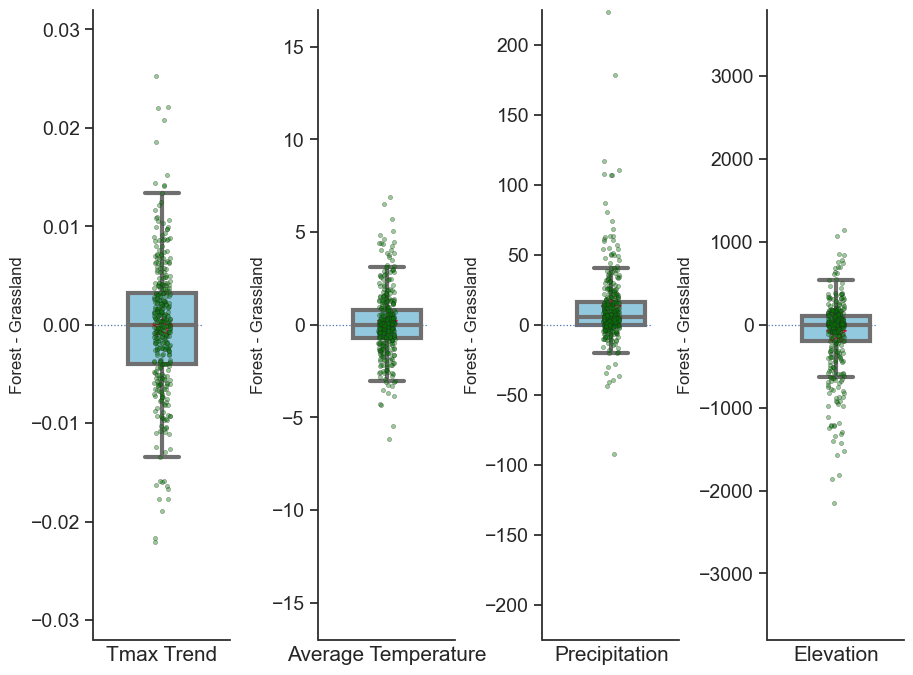

In [397]:
# fig, axs = plt.subplots(ncols=4)
# # sns.set(
# #         style="ticks",                   # The 'ticks' style
# #         rc={"figure.figsize": (17, 9),      # width = 6, height = 9
# #             "figure.facecolor": "ivory",  # Figure colour
# #             "axes.facecolor": "ivory"})  # Axes colour
# sns.set(
#         style="ticks",                   # The 'ticks' style
#         rc={"figure.figsize": (9, 7)})  # Axes colour
# Data = [bps['Tmax Trend'], bps['Average Temperature'], bps['Precipitation'], bps['Elevation']]
# # Data = [Greenup['Diff'], Maturity['Diff'], Senescence['Diff'], Dormancy['Diff']]
# # Data = bps
# limits = [[-0.032,0.032], [-17, 17], [-225,225], [-3800, 3800]]
# # limits = [-0.05,0.07]
# Names = ['Tmax Trend', 'Average Temperature', 'Precipitation', 'Elevation']
# # Names = ['Greenup', 'Maturity', 'Senescence', 'Dormancy']
# # Box plot
# for i in range(4):
#     b = sns.boxplot(data = Data[i],           
#                         width = 0.5,        # The width of the boxes
#                         color = "skyblue",  # Box colour
#                         linewidth = 3,      # Thickness of the box lines
#                         showfliers = False,
#                    showmeans=True,
#                     meanprops={'marker':'*',
#                        "markeredgecolor": "crimson",
#                        "markersize": "15"},
#     # ,
#                    ax = axs[i])  # Sop showing the fliers
#     b = sns.stripplot(data = Data[i],          
#     # y axis column from data
#                       color = "green", # Colours the dots
#                       linewidth = 0.5,     # Dot outline width
#                       alpha = 0.4,
#                         jitter = 0.06,
#                          size = 3,
#     # ,
#                      ax = axs[i])       # Makes them transparent


    

# # Set the y axis and font size
#     # b.set_ylabel("Average Slope Difference", fontsize = 15)
#     b.set_ylim(limits[i])
# # Set the x axis label and font size
#     b.set_xlabel(Names[i], fontsize = 15)
# # Set the plot title with the pval variable and font size
# # Remove axis spines
#     # b.set_title(Names[i], fontsize = 15)
#     sns.despine(offset = 0.5, trim = False)
#     b.axhline(xmin=0, xmax=0.8,linestyle=':', linewidth = 0.9)
#     b.set_ylabel("Forest - Grassland", fontsize = 12)
#     b.tick_params(axis='both', which='major', labelsize=14)  # Change 14 to your desired tick size
#     b.set_xticks([])

# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=1, 
#                     top=1, 
#                     wspace=0.65, 
#                     hspace=0.4)

    
# fig.figure.savefig("Boxplot_metrics.png", dpi=500, bbox_inches='tight', transparent = False)
# # Show the figure
# # sns.regplot(x='value', y='wage', data=df_melt, ax=axs[0])
# # sns.regplot(x='value', y='wage', data=df_melt, ax=axs[1])
# # sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])

In [32]:
# sns.set(
#         style="ticks",                   # The 'ticks' style
#         rc={"figure.figsize": (5, 9)})  # Axes colour
# # Box plot
# b = sns.boxplot(data = boxs[0],       # y axis column from data
#                     width = 0.6,        # The width of the boxes
#                     color = "skyblue",  # Box colour
#                     linewidth = 2,      # Thickness of the box lines
#                     showfliers = False,
#                showmeans=True, 
#                meanprops={'marker':'*',
#                        "markeredgecolor": "red",
#                        "markersize": "10"})  # Sop showing the fliers
# # Strip plot
# b = sns.stripplot(data = boxs[0],      # y axis column from data
#                       color = "crimson", # Colours the dots
#                       linewidth = 0.7,     # Dot outline width
#                       alpha = 0.5,
#                      jitter = 0.15,
#                      size = 2.4)       # Makes them transparent
# # Set the y axis and font size
# b.set_ylabel("Average slope difference", fontsize = 14)
# # Set the x axis label and font size
# b.set_xlabel("bin", fontsize = 14)
# b.axhline(linestyle=':', linewidth = 0.5)
# # Set the plot title with the pval variable and font size
# # b.set_title("p-value = " + str(pval), fontsize = 16)
# # Remove axis spines
# sns.despine(offset = 3, trim = True)
# # Show the figure
# # b.figure.savefig("Bins_Dormant.png", dpi=900, bbox_inches='tight', transparent = True)
# b.get_figure();
# # fig.figure.savefig("Boxplot_4Seasons.png", dpi=900, bbox_inches='tight', transparent = True)

In [344]:
# sns.set(
#         style="ticks",                   # The 'ticks' style
#         rc={"figure.figsize": (6, 9)})  # Axes colour
# # Box plot
# b = sns.boxplot(data = Data,       # y axis column from data
#                     width = 0.5,        # The width of the boxes
#                     color = "skyblue",  # Box colour
#                     linewidth = 2,      # Thickness of the box lines
#                     showfliers = False)  # Sop showing the fliers
# # Strip plot
# b = sns.stripplot(data = Data,      # y axis column from data
#                       color = "crimson", # Colours the dots
#                       linewidth = 0.6,     # Dot outline width
#                       alpha = 0.4,
#                      jitter = 0.11,
#                      size = 2.5)       # Makes them transparent
# # Set the y axis and font size
# b.set_ylabel("Average slope difference", fontsize = 14)
# # Set the x axis label and font size
# b.set_xlabel("Season", fontsize = 14)
# # Set the plot title with the pval variable and font size
# # b.set_title("p-value = " + str(pval), fontsize = 16)
# # Remove axis spines
# sns.despine(offset = 3, trim = True)
# # Show the figure
# b.figure.savefig("Boxplot_4Seasons.png", dpi=900, bbox_inches='tight', transparent = True)
# b.get_figure();
# # fig.figure.savefig("Boxplot_4Seasons.png", dpi=900, bbox_inches='tight', transparent = True)

In [35]:
fig, axs = plt.subplots(2, 3)
sns.set(
        style="ticks",                   # The 'ticks' style
        rc={"figure.figsize": (20, 18)})
            # ,      # width = 6, height = 9
            # "figure.facecolor": "ivory",  # Figure colour
            # "axes.facecolor": "ivory"})  # Axes colour
Dat = [tropics, subtropics, temperates]
Dat1 = [dry, Average, Wet]
Nam = ['Tropics', 'Subtropics', 'Temperates']
Nam1 = ['Dry', 'Average', 'Wet']
# Box plot
for i in range(2):
    if i == 0:
        Data = Dat
        Names = Nam
    else:
        Data = Dat1
        Names = Nam1
    for j in range(3):
        b = sns.boxplot(data = Data[j],           
                            width = 0.5,        # The width of the boxes
                            color = "skyblue",  # Box colour
                            linewidth = 2,      # Thickness of the box lines
                            showfliers = False,
                       showmeans=True,
                       ax = axs[i,j])  # Sop showing the fliers
        b = sns.stripplot(data = Data[j],          
        # y axis column from data
                          # color = "crimson", # Colours the dots
                          linewidth = 0.3,     # Dot outline width
                          alpha = 0.6,
                            jitter = 0.1,
                             size = 4,
                         ax = axs[i,j])       # Makes them transparent




    # Set the y axis and font size
        b.set_ylabel("Forest Slope - Grassland Slope", fontsize = 15)
        b.set_ylim([-0.05, 0.05])
    # Set the x axis label and font size
        b.set_xlabel("Season", fontsize = 15)
    # Set the plot title with the pval variable and font size
    # Remove axis spines
        b.set_title(Names[j], fontsize = 15)
        sns.despine(offset = 5, trim = False)
        b.axhline(linestyle=':', linewidth = 0.5)
        
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=1.5, 
#                     top=1.2, 
#                     wspace=0.35, 
#                     hspace=0.5)
b.get_figure()
fig.figure.savefig("./../results/Boxplot_Lat_Climate_For_FG.png", dpi=600, bbox_inches='tight')
# Show the figure
# sns.regplot(x='value', y='wage', data=df_melt, ax=axs[0])
# sns.regplot(x='value', y='wage', data=df_melt, ax=axs[1])
# sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])

In [776]:
# import seaborn as sns

# sns.set(style="ticks", rc={"axes.facecolor": "white"})
# plt.rcParams["font.family"] = "serif"
# plt.rcParams["font.serif"] = ["Times New Roman"]

# for i, data in enumerate(datasets[:-1]):
#     res = smf.ols(formula="forest ~ grass", data=data).fit()
#     slope = res.params[1]
#     intercept = res.params[0]
#     test = res.f_test("grass = 1").pvalue
#     pv = "<" if test < 0.05 else ">"
#     test = "{:.2e}".format(test)
#     slo = "{:.3f}".format(slope)
#     inter = "{:.3f}".format(intercept)

#     g = sns.jointplot(x="grass", y="forest", data=data, kind="reg", color="purple")
#     g.set_axis_labels('Croplands', 'Forests', fontsize=10)
#     g.fig.suptitle(f'{some[i]}) {seasons[i]}\n\n Y = X * {slo} + {inter}\n Pvalue of Coefficient Equal to 1 {pv} 0.05', fontsize=11, x=0.55, y=0.95)
#     plt.subplots_adjust(top=0.9)

# plt.show()


## Scatter Plots of Seasons

In [39]:
row = 2
col = 2
fig, axs = plt.subplots(row, col)
sns.set(
        style="ticks",                   # The 'ticks' style
        rc={"figure.figsize": (8, 6),      # width = 6, height = 9
            "figure.facecolor": "white",  # Figure colour
            "axes.facecolor": "white"})  # Axes colour
# fig.suptitle('Slope Scatterplots Comparing Forests and Croplands Warming rates', y=1.69, x=0.75, fontsize=12)
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
temp = 0
some = ['a', 'b', 'c','d']
for i in range(row):
    for j in range(col):
        
        res = smf.ols(formula="forest ~ grass", data=datasets[temp]).fit()
        slope = res.params[1]
        intercept = res.params[0]
        test = res.f_test("grass = 1").pvalue
        if test < 0.05:
            pv = "<"
        else:
            pv = ">"
        test = "{:.2e}".format(test)
        slo = "{:.3f}".format(slope)
        inter = "{:.3f}".format(intercept)
        # color_map = {
        #     'Significant': 'purple',
        #     'Non_Significant': 'orange'
        # }
        
        # colors = datasets[temp]['Pval'].map(color_map)

        
        # print(test)
        axs[i, j].scatter(datasets[temp]['grass'], datasets[temp]['forest'], color = 'purple')
        # axs[i, j].set_xlabel('Grasslands')
        # axs[i, j].set_ylabel('Forests')
        axs[i,j].set_xlabel('Forest Slope', fontsize = 15)
        axs[i,j].set_ylabel('Grassland Slope', fontsize = 15)
        axs[i,j].tick_params(axis='both', which='major', labelsize = 15)
        Tit =  some[temp] + ') ' + seasons[temp]+ "\n\n Y = X * " + slo + " + " + inter + "\n Pvalue of Coefficient Equal to 1 " + pv + " 0.05"
        # Tit =  some[temp] + ') ' + seasons[temp]+ "\n\n Coefficient = " + slo
        axs[i, j].set_title(Tit, fontsize=15, loc='left')
        axs[i, j].plot(datasets[temp]['grass'], slope*datasets[temp]['grass'] + intercept, c='orange')
        temp = temp + 1

# fig.tight_layout(pad=100.0)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=1.7, 
                    wspace=0.35, 
                    hspace=0.5)


# Draw a horizontal lines at those coordinates
line = plt.Line2D([0,1.53],[.92,.92], transform=fig.transFigure, linestyle="dotted", color="black", lw=.8)
fig.add_artist(line)
line = plt.Line2D([0.77,0.77],[0,1.85], transform=fig.transFigure, linestyle="dotted", color="black", lw=.8)
fig.add_artist(line)

# plt.savefig("./../results/Scatter_Forest_with_sig.png", format="png", dpi=400, bbox_inches='tight')
plt.show()
# fig()
# print("grass slope =", "{:.4f}".format(a),"*forest Slope +", "{:.2f}".format(b))


In [7]:
# row = 2
# col = 4
# fig, axs = plt.subplots(row, col)
# sns.set(
#         style="ticks",                   # The 'ticks' style
#         rc={"figure.figsize": (29, 13),      # width = 6, height = 9
#             "figure.facecolor": "white",  # Figure colour
#             "axes.facecolor": "white"})  # Axes colour
# # fig.suptitle('Slope Scatterplots Comparing Forests and Croplands Warming rates', y=1.69, x=0.75, fontsize=12)
# plt.rcParams["font.family"] = "serif"
# plt.rcParams["font.serif"] = ["Times New Roman"]
# # plt.rcParams.update({'font.size': 50})
# xs = [0.42, 0 , 1.17]
# ys = [1.8, 0.85]

# temp = 0
# temp1 = 0
# some = ['a', 'b', 'c','d']
# boxs = [S1,S2,S3,S4]
# for i in range(row):
#     for j in range(col):
#         if j%2 == 0:
#             print(i)
#             print(seasons[temp])
#             input()
#             fig.text(s= some[temp] + ') ' + seasons[temp], x=xs[j], y=ys[i], fontfamily='serif',fontstyle = 'italic',fontweight='bold',fontsize=35, ha='center', va='center')
            
            
#             res = smf.ols(formula="forest ~ grass", data=datasets[temp]).fit()
#             slope = res.params[1]
#             intercept = res.params[0]
#             test = res.f_test("grass = 1").pvalue
#             if test < 0.001:
#                 pv = "<"
#             else:
#                 pv = ">"
                     
#             test = "{:.2e}".format(test)
#             slo = "{:.3f}".format(slope)
#             inter = "{:.3f}".format(intercept)

#             # print(test)
#             axs[i,j].scatter(datasets[temp]['grass'], datasets[temp]['forest'], c ="purple")
#             axs[i,j].set_xlabel('Grasslands Slope', fontsize = 33)
#             axs[i,j].set_ylabel('Forests Slope', fontsize = 33)
#             axs[i,j].tick_params(axis='both', which='major', labelsize = 25)
#             # axs[i,j].locator_params(axis='both', nbins=8) 


#             Tit =  "\n\n Y = X * " + slo + " + " + inter + "\n Pvalue of Coefficient Equal to 1 " + pv + " 0.001\n" 
#             # Tit =  some[temp] + ') ' + seasons[temp]+ "\n\n Y = X * " + slo + " + " + inter + "\n Pvalue of Coefficient Equal to 1 " + pv + " 0.05"

#             # Tit =  some[temp] + ') ' + seasons[temp]+ "\n\n Coefficient = " + slo
#             axs[i,j].set_title(Tit, fontsize=30, loc='left', fontstyle='italic')
#             axs[i,j].plot(datasets[temp]['grass'], slope*datasets[temp]['grass'] + intercept, c='orange')
#             temp = temp + 1
#         else:
            
#             # sns.set(
#             #     style="ticks",                   # The 'ticks' style
#             #     rc={"figure.figsize": (5, 9)})  # Axes colour
# # Box plot  
#             if temp1 == 0:
#                 sns.set_palette(my_colors1)
#             elif temp1 == 1:
#                 sns.set_palette(my_colors2)
#             else:
#                 sns.set_palette(my_colors3) 



#             c = sns.boxplot(data = boxs[temp1],       # y axis column from data
#                     width = 0.6,        # The width of the boxes
#                     # color = "skyblue",  # Box colour
#                     linewidth = 2,      # Thickness of the box lines
#                     showfliers = False,
#                showmeans=True, 
#                meanprops={'marker':'*',
#                        "markeredgecolor": "red",
#                        "markersize": "13"},
#                                 ax = axs[i,j])  # Sop showing the fliers
# # Strip plot
#             c = sns.stripplot(data = boxs[temp1],      # y axis column from data
#                       color = "crimson", # Colours the dots
#                       linewidth = 0.7,     # Dot outline width
#                       alpha = 0.5,
#                      jitter = 0.15,
#                      size = 3.3,
#                                   ax = axs[i,j])       # Makes them transparent
# # Set the y axis and font size
#             c.set_ylabel("Forest Slope - Grassland Slope", fontsize = 33)
# # Set the x axis label and font size
#             c.set_xlabel("Ecoregion warming rate quartile", fontsize = 33)
#             # axs[i,j].set_xticks(0, ['I','II','III','IV'])
#             axs[i,j].tick_params(axis='both', which='major', labelsize = 25)
            
#             c.axhline(linestyle=':', linewidth = 0.5)
# # Set the plot title with the pval variable and font size
# # b.set_title("p-value = " + str(pval), fontsize = 16)
# # Remove axis spines
#             # sns.despine(offset = 3, trim = True)
#             temp1 = temp1 + 1


# # fig.tight_layout(pad=100.0)
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=1.5, 
#                     top=1.7, 
#                     wspace=0.3, 
#                     hspace=0.5)


# # Draw a horizontal lines at those coordinates
# line = plt.Line2D([0.05,1.53],[.93,.93], transform=fig.transFigure, linestyle="dotted", color="black", lw=.9)
# fig.add_artist(line)
# line = plt.Line2D([0.78,0.78],[0,1.85], transform=fig.transFigure, linestyle="dotted", color="black", lw=.9)
# fig.add_artist(line)


# plt.savefig("./Results/ScatterandBox2.png", format="png", dpi=400, bbox_inches='tight')
# plt.show()
# # fig()
# # print("grass slope =", "{:.4f}".format(a),"*forest Slope +", "{:.2f}".format(b))


## Quartiles

In [40]:
GR = Greenup.sort_values('tot')
MA = Maturity.sort_values('tot')
SE = Senescence.sort_values('tot')
DO = Dormancy.sort_values('tot')
AN = Annual.sort_values('tot')
# MA = MA[MA['grass'] > 0]
# MA = MA[MA['forest'] > 0]
# MA = MA.sort_values('tot')


In [44]:
358/4

89.5

In [45]:
Bins = pd.DataFrame()
for i in range(4):
    DA = MA.iloc[89*i:89*(i+1)]
    # if i == 3:
    #     DA = GR.iloc[132*i:]
    Q = DA['Diff'].values
    print(len(Q))
    Bins[i] = Q

89
89
89
89


In [80]:
# from scipy import stats
# mu = 0
# t_stat, p_value = stats.ttest_1samp(Bins[3], mu)
# p_value

In [67]:
# S1 = S1.set_axis(['1', '2', '3', '4'], axis=1)
# S2 = S2.set_axis(['1', '2', '3', '4'], axis=1)
# S3 = S3.set_axis(['1', '2', '3', '4'], axis=1)
# S4 = S4.set_axis(['1', '2', '3', '4'], axis=1)

In [47]:
Bins = Bins.set_axis(['0-25%', '25-50%', '50-75%', '75-100%'], axis=1)

In [48]:
F = sns.xkcd_rgb['lemon lime']

In [49]:
my_colors1 = [F, 'skyblue', 'skyblue', 'skyblue'] 
my_colors2 = ['skyblue', 'skyblue', 'skyblue', F] 
my_colors3 = ['skyblue', 'skyblue', 'skyblue', 'skyblue'] 

In [224]:
# for i in range(4):
#     for j in ['1','2','3','4']:
#         t_stat, p_value = stats.ttest_1samp(boxs[i][j], 0)
#         print(p_value)
#     input()


In [192]:
# AN = Annual.sort_values('Diff')
# AN

In [72]:
# RangeDIFF[]
# for Data in [Greenup, Maturity, Senescence, Dormancy]:
#     minn = min(Data['grass'])
#     maxx = max(Data['grass'])
#     limit = np.arange(minn, maxx+0.001, (maxx - minn)/7)
#     # limit.append(maxx)
#     Ranges.append(limit)
    

In [73]:
# Ranges[0]

In [50]:
sns.set(
        style="ticks",                   # The 'ticks' style
        rc={"figure.figsize": (5, 10)})  # Axes colour
# Box plot

sns.set_palette(my_colors3)
b = sns.boxplot(data = Bins,       # y axis column from data
                    width = 0.6,        # The width of the boxes
                    # color = "skyblue",  # Box colour
                    linewidth = 2,      # Thickness of the box lines
                    showfliers = False,
               showmeans=True, 
               meanprops={'marker':'*',
                       "markeredgecolor": "red",
                       "markersize": "10"})  # Sop showing the fliers
# Strip plot
b = sns.stripplot(data = Bins,      # y axis column from data
                      color = "crimson", # Colours the dots
                      linewidth = 0.7,     # Dot outline width
                      alpha = 0.5,
                     jitter = 0.15,
                     size = 2.4)       # Makes them transparent
# Set the y axis and font size
b.set_ylabel("Average slope difference", fontsize = 18)
# Set the x axis label and font size
b.set_xlabel("Quartile", fontsize = 18)
b.axhline(linestyle=':', linewidth = 0.9)
b.tick_params(axis='both', which='major', labelsize=15)  # Change 14 to your desired tick size

# Set the plot title with the pval variable and font size
b.set_title("Greenup", fontsize = 22, color= 'purple')
# Remove axis spines
sns.despine(offset = 3, trim = True)
# Show the figure
# b.figure.savefig("./Paper Figs/Bins_GR.png", dpi=900, bbox_inches='tight', transparent = True)
b.get_figure();
# fig.figure.savefig("Boxplot_4Seasons.png", dpi=900, bbox_inches='tight', transparent = True)

## Plotting slope values for all ecoregions

In [285]:
# GRU = []
# MAT = []
# SEN = []
# DOR = []
# NAMES = ['Greenup', 'Maturity', 'Senescence', 'Dormancy']
# DIF4 = pd.DataFrame()
# #print(DIF)
# input()
# temp = 0

# for Data in [GR, MA, SE, DO]:
#     for i in range(4):
#         # DA = Data[(Data['grass'] < Ranges[temp][i+1]) & (Data['grass'] >= Ranges[temp][i])]
#         DA = Data.iloc[132*i:132*(i+1)]
#         Q = DA['Diff'].values
#         DIF4[i] = Q
#         print(len(DA))
#         print(np.mean(DA['Diff']))
#     temp = temp + 1 
#     print(DIF1)
#     input()


In [ ]:
import sys
!{sys.executable} -m pip install salem

In [53]:
import sys
!{sys.executable} -m pip install regionmask

     |████████████████████████████████| 73 kB 2.0 MB/s eta 0:00:011
     |████████████████████████████████| 1.1 MB 49.8 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 2.5 MB/s s eta 0:00:01
     |████████████████████████████████| 2.5 MB 120.2 MB/s eta 0:00:01
     |████████████████████████████████| 21.5 MB 116.3 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 110.1 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 14.5 MB/s  eta 0:00:01


In [54]:
import salem
import regionmask
shdf1 = salem.read_shapefile('./../data/terr-ecoregions-TNC/tnc_terr_ecoregions.shp')

In [57]:
orig = xr.open_dataarray('./../data/aridity_new.nc')

In [59]:
First = xr.open_dataarray('./../data/aridity_new.nc')
Second = xr.open_dataarray('./../data/aridity_new.nc')
Third = xr.open_dataarray('./../data/aridity_new.nc')
Fourth = xr.open_dataarray('./../data/aridity_new.nc')

List = [First, Second, Third, Fourth]

In [61]:
i = AN
# for i in [Greenup, Maturity, Senescence, Dormancy, Annual]:
# for i in [Up, Down]:

Diff = orig.sel(latitude=slice(69.98, 20), longitude=slice(-168, -52.6))
# For = orig.sel(latitude=slice(69.98, 7.2), longitude=slice(-168, -52.6))
# Gra = orig.sel(latitude=slice(69.98, 7.2), longitude=slice(-168, -52.6))

# Diff = xr.open_dataarray('aridity_new.nc')
# Diff = List2[f]

# test_data = test_data
Diff.data[Diff.data < 1000000] = np.nan
# For.data[For.data < 1000000] = np.nan
# Gra.data[Gra.data < 1000000] = np.nan

for j in range(len(shdf1)):
    if j%400 == 0:
        print(j)
    # if j > 0:
    #     continue
    try:
        Code = i.loc[j, 'Name']
    except:
        
        continue
    Code = Code[4:10]
    try:
        loc = shdf1.loc[shdf1['ECO_CODE'] == Code]
        Pol = loc.iloc[0].geometry
    except:
        continue

    poly = regionmask.Regions([Pol])
    try:
        mask = poly.mask(Diff, lat_name = 'latitude', lon_name = 'longitude')
    except:
        continue
    Diff.data[mask == 0] = i.loc[j, 'Diff']
    # Diff2.data[mask == 0] = np.nan
    # For.data[mask == 0] = i.loc[j, 'forest']
    # Gra.data[mask == 0] = i.loc[j, 'grass']
    # List2[f] = Diff

0
400
800


In [62]:
Diff2 = xr.open_dataarray('./../data/Allgrid_Slopes.nc')
subset = Diff2.sel(latitude=slice(69.98, 20), longitude=slice(-168, -52.6))
A = Diff.data < 100000 
subset.plot()
subset.data[A == True] = np.nan

In [7]:
# np.unique(Diff.data, return_counts= True) 

In [64]:
import sys
!{sys.executable} -m pip install cartopy

     |████████████████████████████████| 11.6 MB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 6.0 MB/s  eta 0:00:01


In [65]:
import geopandas as gpd
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [91]:
# shdf1.to_csv('shapes.csv')

## Subsetting the Regions

In [67]:
import salem
import regionmask
shdf1 = salem.read_shapefile('./../data/terr-ecoregions-TNC/tnc_terr_ecoregions.shp')

for i in range(len(shdf1)):
    Pol = shdf1.loc[i].geometry


    Regions_pol = regionmask.Regions([Pol])
    bounds = Regions_pol.bounds[0]

    if bounds[2]-bounds[0] < 0.3 or bounds[3]-bounds[1] < 0.3:
        shdf1 = shdf1.drop(i)
        continue
    if bounds[3] < -59.975 or bounds[1] > 69.975:
        shdf1 = shdf1.drop(i)
        continue
    if shdf1.loc[i]['min_y'] < 20 or shdf1.loc[i]['max_y'] > 69.975 or shdf1.loc[i]['min_x'] < -168 or shdf1.loc[i]['max_x'] > -52.6 :
        shdf1 = shdf1.drop(i)
        continue
    


# Diff = orig.sel(latitude=slice(69.98, 7.2), longitude=slice(-168, -52.6))


In [68]:
Diff = Diff.rename('Average Temperature Trend')

In [69]:
fig = plt.figure(figsize=(13, 7))
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
img = Diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap = 'RdBu_r', add_colorbar=True)

# Overlay shapefile boundaries
shdf1.boundary.plot(ax=ax, color='black', linewidth=0.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linestyle='--', linewidth = 0.5)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

# Add title and labels
plt.title('Average Slope Difference in North America / Maturity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# plt.colorbar(img, ax=ax).remove()
# cbar = fig.colorbar(img, ax=ax, orientation='vertical', shrink=0.9)

# Show the plot
# plt.savefig('Mat_76.png', format="png", dpi=400, bbox_inches='tight')
plt.show()

## Two Example Regions

In [74]:
# files = [f.path for f in os.scandir('./../data/Regions/' + 'Div_Lc') if f.is_file()]
# files = sorted(files)

In [75]:
# files2 = [f.path for f in os.scandir('./../data/Results/' + 'Annual') if f.is_file()]
# files2 = sorted(files2)

In [76]:
# LC = xr.open_dataarray(files[696])
# region = xr.open_dataset(files2[681]).slopes
# Forest = region[:]
# Grass = region[:]
# GG = LC.data != 6
# FF = LC.data != 2
# Forest.data[FF] = np.nan 
# Grass.data[GG] = np.nan

In [77]:
# LC = xr.open_dataarray(files[733])
# region = xr.open_dataset(files2[718]).slopes
# Forest2 = region[:]
# Grass2 = region[:]
# GG = LC.data != 6
# FF = LC.data != 2
# Forest2.data[FF] = np.nan 
# Grass2.data[GG] = np.nan

In [78]:
cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, 'aspect':40, 'label':'Percent Deviation'}

In [79]:
cbar_kwargs = {'orientation':'vertical', 'shrink':0.6, 'aspect':40, 'label':'Grassland Slope - Forest Slope' , 'pad':-2}

## North America

In [80]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches

In [81]:
# fig = plt.figure(figsize=(14, 8))
# # ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())

# shdf1.boundary.plot(color='black', linewidth=0.7)
# Forest_plot = Forest.plot(cmap = 'Greens',  add_colorbar=False, robust = True)
# Grass_plot = Grass.plot(cmap = 'Oranges', add_colorbar=False, robust = True)  # Suppress colorbar for Grassland
# # plt.colorbar(Forest_plot,location='left', shrink = 0.7)
# # plt.colorbar(Grass_plot,location='right', shrink = 0.7)
# # plt.show()
# # plt.savefig('For_dom.png')

In [82]:
# Diff2 = xr.open_dataarray('Allgrid_Slopes.nc')
# subset = Diff2.sel(latitude=slice(69.98, 20), longitude=slice(-168, -52.6))
# A = Diff.data < 100000 
# subset.plot()
# subset.data[A == True] = np.nan

In [83]:
# subset.data[subset.data < 1000] = 1

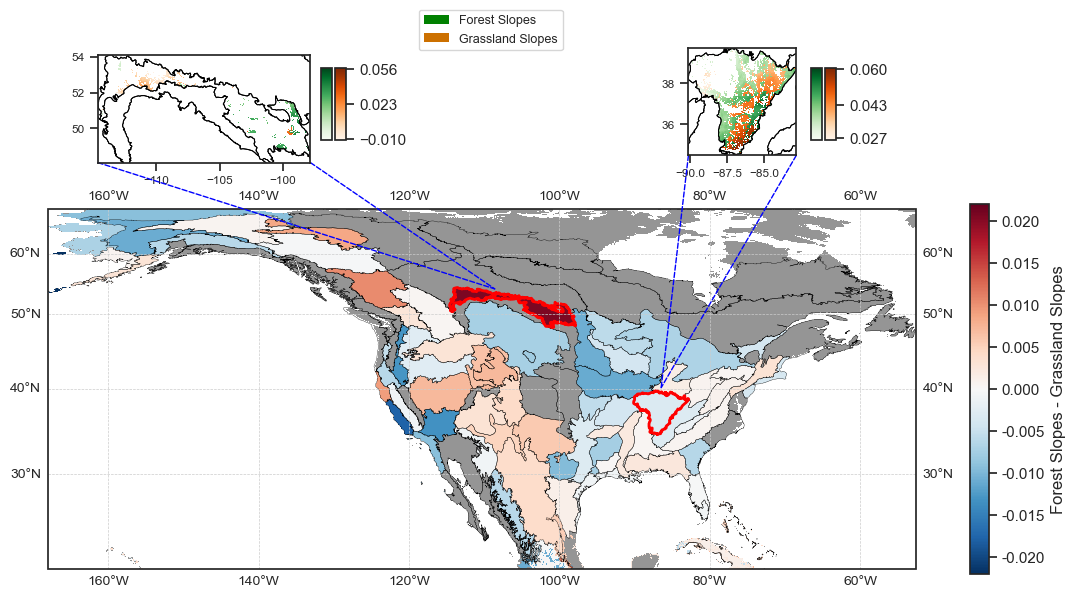

In [142]:
# import matplotlib.pyplot as plt
# import xarray as xr
# import geopandas as gpd
# import cartopy.crs as ccrs
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# from matplotlib.patches import ConnectionPatch

# # Assuming all your data loading code remains the same.
# shapes = shdf1

# # Plot xarray data
# # fig, ax = plt.subplots(figsize=(14, 6), projection=ccrs.LambertCylindrical())
# fig, ax = plt.subplots(figsize=(14, 6), subplot_kw={'projection': ccrs.LambertCylindrical()})
# # Main plot
# img = Diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r', add_colorbar=False)
# img2 = subset.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Greys', add_colorbar=False)
# shapes[shapes.index != 709].boundary.plot(ax=ax, transform=ccrs.PlateCarree(), color='black', linewidth=0.25)
# shapes[(shapes.index == 709) | (shapes.index == 746)].boundary.plot(ax=ax, transform=ccrs.PlateCarree(), color='red', linewidth=2)

# # Add gridlines
# gl = ax.gridlines(draw_labels=True, linestyle='--', linewidth=0.5)
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# gl.xlabel_style = {'size': 10}
# gl.ylabel_style = {'size': 10}

# # Add colorbar for the main plot
# cbar = plt.colorbar(img, ax=ax, orientation='vertical', shrink=0.8, format='%.3f')
# cbar.set_label('Forest Slopes - Grassland Slopes')

# # Inset axes outside the main figure
# # The parameters may need adjustment depending on your figure's layout
# axins = inset_axes(ax, width="30%", height="30%", loc='lower left', 
#                    bbox_to_anchor=(0.65, 1.15, 1, 1),
#                    bbox_transform=ax.transAxes, borderpad=0)

# # Plotting Forest and Grassland on the inset
# Forest_plot = Forest.plot(ax=axins,  cmap='Greens', add_colorbar=False, robust=True)
# Grass_plot = Grass.plot(ax=axins,  cmap='Oranges', add_colorbar=False, robust=True)
# shapes.boundary.plot(ax=axins, color='black', linewidth=0.7)

# # Setting the zoomed area's limits
# x_min = shapes.loc[709]['min_x']
# x_max = shapes.loc[709]['max_x']
# y_min = shapes.loc[709]['min_y']
# y_max = shapes.loc[709]['max_y']
# axins.set_xlim(x_min, x_max)
# axins.set_ylim(y_min, y_max)

# # Add colorbar for Forest in the inset plot


# # Connection lines between the main plot and the inset
# # Adjust according to your specific requirements
# xx = x_min + (x_max - x_min) / 2
# lower_left = (xx, y_max - 3)
# upper_right = (xx, y_max - 3)
# con1 = ConnectionPatch(xyA=(0, 0), xyB=lower_left, coordsA="axes fraction", coordsB="data",
#                        axesA=axins, axesB=ax, color="blue", linestyle="--")
# axins.add_artist(con1)
# con2 = ConnectionPatch(xyA=(1, 0), xyB=upper_right, coordsA="axes fraction", coordsB="data",
#                        axesA=axins, axesB=ax, color="blue", linestyle="--")
# axins.add_artist(con2)


# cax1_inset = fig.add_axes([0.67, 0.91, 0.008, 0.12])  # Adjust position as needed
# cbar1_inset = plt.colorbar(Forest_plot, cax=cax1_inset)
# # cbar1_inset.set_label('Grassland Slopes')
# # # Add colorbar for Grassland in the inset plot
# cax2_inset = fig.add_axes([0.68, 0.91, 0.008, 0.12])  # Adjust position as needed
# cbar2_inset = plt.colorbar(Grass_plot, cax=cax2_inset)
# # cbar2_inset.set_label('Grassland Slopes')

# min_val = min(Forest.min().values, Grass.min().values)
# max_val = max(Forest.max().values, Grass.max().values)

# tick_values = [min_val + 0.001,min_val + (max_val - min_val)/2,max_val]
# rounded_tick_values = [np.round(value, 3) for value in tick_values]  # Round to 2 decimal places, adjust as needed

# cbar1_inset.set_ticks(rounded_tick_values)
# cbar2_inset.set_ticks(rounded_tick_values)


# Forest_plot.set_clim(min_val, max_val)
# Grass_plot.set_clim(min_val, max_val)
# cax1_inset.set_yticks([])
# cax1_inset.set_yticklabels([])

# axins.set_xlim(x_min,x_max)  # Specify the desired limits for the zoomed-in box
# axins.set_ylim(y_min,y_max)  # Specify the desired limits for the zoomed-in box
# axins.set_xlabel('')  # Adjust font size for x-axis label
# axins.set_ylabel('')  # Adjust font size for y-axis label
# axins.tick_params(axis='both', which='major', labelsize=8.5)  # Adjust font size for ticks






# ######################################################################################################
# ######################################################################################################
# ######################################################################################################
# ######################################################################################################


# # axins1 = inset_axes(ax, width="30%", height="30%", loc='lower left', 
# #                    bbox_to_anchor=(-0.07, 1.2, 1, 1),
# #                    bbox_transform=ax.transAxes, borderpad=0)

# # # Plotting Forest and Grassland on the inset
# # Forest1_plot = Forest1.plot(ax=axins1, cmap='Greens', add_colorbar=False, robust=True)
# # Grass1_plot = Grass1.plot(ax=axins1, cmap='Oranges', add_colorbar=False, robust=True)
# # shapes.boundary.plot(ax=axins1, color='black', linewidth=0.7)

# # # Setting the zoomed area's limits
# # x_min = shapes.loc[759]['min_x']
# # x_max = shapes.loc[759]['max_x']
# # y_min = shapes.loc[759]['min_y']
# # y_max = shapes.loc[759]['max_y']
# # axins1.set_xlim(x_min, x_max)
# # axins1.set_ylim(y_min, y_max)

# # # Add colorbar for Forest in the inset plot


# # # Connection lines between the main plot and the inset
# # # Adjust according to your specific requirements
# # xx = x_min + (x_max - x_min) / 2
# # lower_left = (x_max - 1.5, y_min + 2)
# # upper_right = (x_max - 1.5, y_min + 2)
# # con3 = ConnectionPatch(xyA=(0, 0), xyB=lower_left, coordsA="axes fraction", coordsB="data",
# #                        axesA=axins1, axesB=ax, color="blue", linestyle="--")
# # axins1.add_artist(con3)
# # con4 = ConnectionPatch(xyA=(1, 0), xyB=upper_right, coordsA="axes fraction", coordsB="data",
# #                        axesA=axins1, axesB=ax, color="blue", linestyle="--")
# # axins1.add_artist(con4)


# # cax3_inset = fig.add_axes([0.28, 1.07, 0.008, 0.12])  # Adjust position as needed
# # cbar3_inset = plt.colorbar(Forest1_plot, cax=cax3_inset)
# # # cbar1_inset.set_label('Grassland Slopes')
# # # # Add colorbar for Grassland in the inset plot
# # cax4_inset = fig.add_axes([0.29, 1.07, 0.008, 0.12])  # Adjust position as needed
# # cbar4_inset = plt.colorbar(Grass1_plot, cax=cax4_inset)
# # # cbar2_inset.set_label('Grassland Slopes')

# # min_val = min(Forest1.min().values, Grass1.min().values)
# # max_val = max(Forest1.max().values, Grass1.max().values)
# # tick_values = [min_val,min_val + (max_val - min_val)/2,max_val]
# # rounded_tick_values = [np.round(value, 2) for value in tick_values]  # Round to 2 decimal places, adjust as needed

# # cbar3_inset.set_ticks(rounded_tick_values)
# # cbar4_inset.set_ticks(rounded_tick_values)


# # Forest1_plot.set_clim(min_val, max_val)
# # Grass1_plot.set_clim(min_val, max_val)
# # cax3_inset.set_yticks([])
# # cax3_inset.set_yticklabels([])

# # axins1.set_xlim(x_min,x_max)  # Specify the desired limits for the zoomed-in box
# # axins1.set_ylim(y_min,y_max)  # Specify the desired limits for the zoomed-in box
# # axins1.set_xlabel('')  # Adjust font size for x-axis label
# # axins1.set_ylabel('')  # Adjust font size for y-axis label
# # axins1.tick_params(axis='both', which='major', labelsize=8.5)  # Adjust font size for ticks


# # # forest_patch = mpatches.Patch(color='green', label='Forest Slopes', linewidth=0)
# # # grassland_patch = mpatches.Patch(color='#FF8C00', label='Grassland Slopes', linewidth=0)


# # # # Plot the custom legend
# # # plt.legend(handles=[forest_patch, grassland_patch], loc=(-15.5, 1.25), fontsize=8)



# ######################################################################################################
# ######################################################################################################
# ######################################################################################################
# ######################################################################################################


# axins2 = inset_axes(ax, width="30%", height="30%", loc='lower left', 
#                    bbox_to_anchor=(0.03, 1.13, 1, 1),
#                    bbox_transform=ax.transAxes, borderpad=0)

# # Plotting Forest and Grassland on the inset
# Forest2_plot = Forest2.plot(ax=axins2, cmap='Greens', add_colorbar=False, robust=True)
# Grass2_plot = Grass2.plot(ax=axins2, cmap='Oranges', add_colorbar=False, robust=True)
# shapes.boundary.plot(ax=axins2, color='black', linewidth=0.7)

# # Setting the zoomed area's limits
# x_min = shapes.loc[746]['min_x']
# x_max = shapes.loc[746]['max_x']
# y_min = shapes.loc[746]['min_y']
# y_max = shapes.loc[746]['max_y']
# axins2.set_xlim(x_min, x_max)
# axins2.set_ylim(y_min, y_max)

# # Add colorbar for Forest in the inset plot


# # Connection lines between the main plot and the inset
# # Adjust according to your specific requirements
# xx = x_min + (x_max - x_min) / 2
# lower_left = (x_min + 6, y_max -8)
# upper_right = (x_min + 6, y_max - 8)
# con5 = ConnectionPatch(xyA=(0, 0), xyB=lower_left, coordsA="axes fraction", coordsB="data",
#                        axesA=axins2, axesB=ax, color="blue", linestyle="--")
# axins2.add_artist(con5)
# con6 = ConnectionPatch(xyA=(1, 0), xyB=upper_right, coordsA="axes fraction", coordsB="data",
#                        axesA=axins2, axesB=ax, color="blue", linestyle="--")
# axins2.add_artist(con6)


# cax5_inset = fig.add_axes([0.32, 0.91, 0.008, 0.12])  # Adjust position as needed
# cbar5_inset = plt.colorbar(Forest2_plot, cax=cax5_inset)
# # cbar1_inset.set_label('Grassland Slopes')
# # # Add colorbar for Grassland in the inset plot
# cax6_inset = fig.add_axes([0.33, 0.91, 0.008, 0.12])  # Adjust position as needed
# cbar6_inset = plt.colorbar(Grass2_plot, cax=cax6_inset)
# # cbar2_inset.set_label('Grassland Slopes')

# min_val = min(Forest2.min().values, Grass2.min().values)
# max_val = max(Forest2.max().values, Grass2.max().values)

# tick_values = [min_val+ 0.001,min_val + (max_val - min_val)/2,max_val]
# rounded_tick_values = [np.round(value, 3) for value in tick_values]  # Round to 2 decimal places, adjust as needed

# cbar5_inset.set_ticks(rounded_tick_values)
# cbar6_inset.set_ticks(rounded_tick_values)


# Forest2_plot.set_clim(min_val, max_val)
# Grass2_plot.set_clim(min_val, max_val)
# cax5_inset.set_yticks([])
# cax5_inset.set_yticklabels([])

# axins2.set_xlim(x_min,x_max)  # Specify the desired limits for the zoomed-in box
# axins2.set_ylim(y_min,y_max)  # Specify the desired limits for the zoomed-in box
# axins2.set_xlabel('')  # Adjust font size for x-axis label
# axins2.set_ylabel('')  # Adjust font size for y-axis label
# axins2.tick_params(axis='both', which='major', labelsize=8.5)  # Adjust font size for ticks

# forest_patch = mpatches.Patch(color='green', label='Forest Slopes', linewidth=0)
# grassland_patch = mpatches.Patch(color='#cc7000', label='Grassland Slopes', linewidth=0)


# # Plot the custom legend
# plt.legend(handles=[forest_patch, grassland_patch], loc=(7.5, 1.25), fontsize=9)

# # plt.savefig('North_america_2reg_EA.png', format="png", dpi=600, bbox_inches='tight')


# plt.show()



In [9]:
# import matplotlib.pyplot as plt
# import xarray as xr
# import geopandas as gpd
# import cartopy.crs as ccrs
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# import matplotlib.patches as patches
# import matplotlib.patches as mpatches

# # Load your xarray data
# # Assuming you have loaded your xarray dataset or data array, let's call it "data".
# # Replace 'data' with your actual xarray data.

# # Load shapefile boundaries into a GeoDataFrame
# shapes = shdf1

# # Select the shape you want to focus on (for example, the first shape)
# selected_shape = shapes.loc[709]
# Diff = Diff.rename('Forest Slopes - Grassland Slopes')

# # Extract the coordinates of the selected shape

# x_min, y_min = selected_shape.min_x, selected_shape.min_y
# x_max, y_max = selected_shape.max_x, selected_shape.max_y

# # Plot xarray data
# fig = plt.figure(figsize=(14, 6))
# ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
# img = Diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r', add_colorbar = False)

# shapes[shapes.index != 709].boundary.plot(ax=ax, color='black', linewidth=0.25)
# # Plot boundary of the selected region with a different color
# shapes[shapes.index == 709].boundary.plot(ax=ax, color='red', linewidth=2)


# # Overlay shapefile boundaries
# # shapes.boundary.plot(ax=ax, color='black', linewidth=0.25)

# # Add gridlines
# gl = ax.gridlines(draw_labels=True, linestyle='--', linewidth=0.5)
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# gl.xlabel_style = {'size': 10}
# gl.ylabel_style = {'size': 10}

# # Add title and labels
# # plt.title('Xarray Data with Shapefile Boundaries')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

# # Remove original colorbar
# plt.gcf().colorbar(img, ax=ax).remove()

# # Add colorbar
# cbar = plt.colorbar(img, ax=ax, orientation='vertical', shrink=0.9, format='%.3f')
# cbar.set_label('Forest Slopes - Grassland Slopes')

# # Add zoom box
# axins = ax.inset_axes([0.05, 0.14, 0.35, 0.35])
# # img2 = some.slopes.plot(ax=axins, cmap='viridis', add_colorbar = False)
# shdf1.boundary.plot(ax=axins, color='black', linewidth=0.7)
# # cbar2 = plt.colorbar(img2, ax=axins, orientation='vertical', shrink=1)


# Forest_plot = Forest.plot(ax=axins, cmap = 'Greens',  add_colorbar=False, robust = True)
# divider = make_axes_locatable(axins)
# cax1 = divider.append_axes("right", size="6%", pad=-0.1, aspect = 100)
# cbar1 = plt.colorbar(Forest_plot, cax=cax1)
# # cbar1.set_label('Forest Slopes')

# # Plot Grassland
# Grass_plot = Grass.plot(ax=axins, cmap = 'Oranges', add_colorbar=False, robust = True)  # Suppress colorbar for Grassland
# shdf1.boundary.plot(ax=axins, color='black', linewidth=0.7)

# # # Append axes to the right of the current axes
# cax2 = divider.append_axes("right", size="6%", pad=0, aspect=100)

# # Add colorbar for Grassland
# cbar2 = plt.colorbar(Grass_plot, cax=cax2, shrink=0.6)
# # cbar2.set_label('Grassland Slopes', rotation=90)
# # ax.text(1.3,0.5,'Foo',rotation=90)

# cbar1.ax.tick_params(labelsize=8)  # Adjust font size for colorbar 1
# cbar2.ax.tick_params(labelsize=8)  # Adjust font size for colorbar 2
# # cbar1.ax.set_position([0.5, 0.1, 0.4, 0.05])  # [left, bottom, width, height]
# min_val = min(Forest.min().values, Grass.min().values)
# max_val = max(Forest.max().values, Grass.max().values)

# num_ticks = 3  # Number of ticks
# tick_values = np.linspace(min_val, max_val, num=num_ticks)
# rounded_tick_values = [round(value, 3) for value in tick_values]  # Round to 2 decimal places, adjust as needed

# cbar1.set_ticks(rounded_tick_values)
# cbar2.set_ticks(rounded_tick_values)


# Forest_plot.set_clim(min_val, max_val)
# Grass_plot.set_clim(min_val, max_val)
# cax1.set_yticks([])
# cax1.set_yticklabels([])

# axins.set_xlim(x_min,x_max)  # Specify the desired limits for the zoomed-in box
# axins.set_ylim(y_min,y_max)  # Specify the desired limits for the zoomed-in box
# axins.set_xlabel('')  # Adjust font size for x-axis label
# axins.set_ylabel('')  # Adjust font size for y-axis label
# axins.tick_params(axis='both', which='major', labelsize=8.5)  # Adjust font size for ticks


# forest_patch = mpatches.Patch(color='green', label='Forest Slopes', linewidth=0)
# grassland_patch = mpatches.Patch(color='#FF8C00', label='Grassland Slopes', linewidth=0)


# # Plot the custom legend
# plt.legend(handles=[forest_patch, grassland_patch], loc=(-10, 1.55), fontsize=8)


# # Show the plot
# # plt.savefig('North_america.png', format="png", dpi=400, bbox_inches='tight')
# plt.show()


## Plots of Different Bins

In [84]:
import salem
import regionmask
shdf1 = salem.read_shapefile('./../data/terr-ecoregions-TNC/tnc_terr_ecoregions.shp')

for i in range(len(shdf1)):
    Pol = shdf1.loc[i].geometry


    Regions_pol = regionmask.Regions([Pol])
    bounds = Regions_pol.bounds[0]

    if bounds[2]-bounds[0] < 0.3 or bounds[3]-bounds[1] < 0.3:
        shdf1 = shdf1.drop(i)
        continue
    if bounds[3] < -59.975 or bounds[1] > 69.975:
        shdf1 = shdf1.drop(i)
        continue
    # if shdf1.loc[i]['min_y'] < 20 or shdf1.loc[i]['max_y'] > 69.975 or shdf1.loc[i]['min_x'] < -168 or shdf1.loc[i]['max_x'] > -52.6 :
    #     shdf1 = shdf1.drop(i)
    #     continue
    

In [144]:
# List2 = []
for f in range(4):
    i = MA[92*f:92*(f + 1)]
    if f == 3:
        i = MA[92*f:]
    # for i in [Greenup, Maturity, Senescence, Dormancy, Annual]:
    # for i in [Up, Down]:

    # Diff = orig.sel(latitude=slice(69.98, 20), longitude=slice(-168, -52.6))
    # For = orig.sel(latitude=slice(69.98, 7.2), longitude=slice(-168, -52.6))
    # Gra = orig.sel(latitude=slice(69.98, 7.2), longitude=slice(-168, -52.6))

    # Diff = xr.open_dataarray('aridity_new.nc')
    Diff = List[f]

    # test_data = test_data
    Diff.data[Diff.data < 1000000] = np.nan
    # For.data[For.data < 1000000] = np.nan
    # Gra.data[Gra.data < 1000000] = np.nan

    for j in range(len(shdf1)):
        if j%400 == 0:
            print(j)
        # if j > 0:
        #     continue
        try:
            Code = i.loc[j, 'Name']
        except:
            continue
        Code = Code[4:10]
        try:
            loc = shdf1.loc[shdf1['ECO_CODE'] == Code]
            Pol = loc.iloc[0].geometry
        except:
            continue

        poly = regionmask.Regions([Pol])
        try:
            mask = poly.mask(Diff, lat_name = 'latitude', lon_name = 'longitude')
        except:
            continue
        # Diff.data[mask == 0] = i.loc[j, 'tot']
        Diff.data[mask == 0] = f
        # For.data[mask == 0] = i.loc[j, 'forest']
        # Gra.data[mask == 0] = i.loc[j, 'grass']
        List[f] = Diff

0
400
0
400
0
400
0
400


In [147]:
# colors = ['Greens', yellow_cmap, 'Oranges', dark_red_cmap]

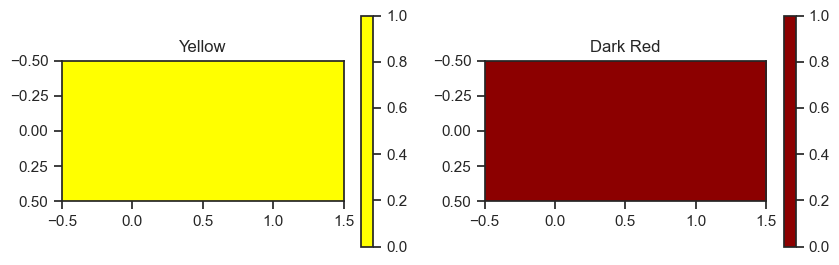

In [146]:
# import matplotlib.pyplot as plt
# from matplotlib.colors import LinearSegmentedColormap

# # Define the colors
# yellow = '#FFFF00'  # Yellow color
# dark_red = '#8B0000'  # Dark red color

# # Create a dictionary for the yellow colormap
# yellow_cmap_dict = {'red':   ((0.0, 1.0, 1.0),
#                               (1.0, 1.0, 1.0)),
#                     'green': ((0.0, 1.0, 1.0),
#                               (1.0, 1.0, 1.0)),
#                     'blue':  ((0.0, 0.0, 0.0),
#                               (1.0, 0.0, 0.0))}

# # Create the yellow colormap object
# yellow_cmap = LinearSegmentedColormap('Yellow', yellow_cmap_dict)

# # Create a dictionary for the dark red colormap
# dark_red_cmap_dict = {'red':   ((0.0, 0.55, 0.55),
#                                 (1.0, 0.55, 0.55)),
#                       'green': ((0.0, 0.0, 0.0),
#                                 (1.0, 0.0, 0.0)),
#                       'blue':  ((0.0, 0.0, 0.0),
#                                 (1.0, 0.0, 0.0))}

# # Create the dark red colormap object
# dark_red_cmap = LinearSegmentedColormap('DarkRed', dark_red_cmap_dict)

# # Plot colorbars to visualize the colormaps
# fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# # Yellow colorbar
# im1 = axes[0].imshow([[0, 1]], cmap=yellow_cmap)
# axes[0].set_title('Yellow')
# fig.colorbar(im1, ax=axes[0])

# # Dark red colorbar
# im2 = axes[1].imshow([[0, 1]], cmap=dark_red_cmap)
# axes[1].set_title('Dark Red')
# fig.colorbar(im2, ax=axes[1])

# plt.show()


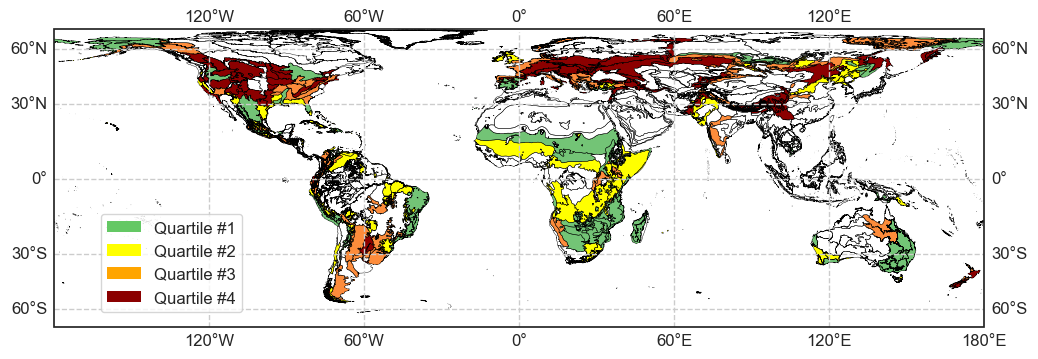

CPU times: user 1min 41s, sys: 9.58 s, total: 1min 50s
Wall time: 1min 56s


In [148]:
# %%time
# fig = plt.figure(figsize=(12, 10))
# ax = plt.subplot(1, 1, 1, projection=ccrs.LambertCylindrical())
# for i in range(4):
#     img = List[i].plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False, cmap = colors[i])

# # Overlay shapefile boundaries
# shdf1.boundary.plot(ax=ax, transform=ccrs.PlateCarree(),color='black', linewidth=0.3)

# # Add gridlines
# gl = ax.gridlines(draw_labels=True, linestyle='--')
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# gl.xlabel_style = {'size': 12}
# gl.ylabel_style = {'size': 12}

# # Add title and labels
# # plt.title('Greenup', fontsize = 15)
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

# plt.colorbar(img, ax=ax).remove()
# # cbar = fig.colorbar(img, ax=ax, orientation='vertical', shrink=0.6)

# Q1 = mpatches.Patch(color='#64C864', label='Quartile #1', linewidth=0)
# Q2 = mpatches.Patch(color='#FFFF00', label='Quartile #2', linewidth=0)
# Q3 = mpatches.Patch(color='orange', label='Quartile #3', linewidth=0)
# Q4 = mpatches.Patch(color='#8B0000', label='Quartile #4', linewidth=0)


# # Plot the custom legend
# plt.legend(handles=[Q1, Q2, Q3, Q4], loc=(0.05, 0.05), fontsize=12)

# # Show the plot
# # plt.savefig('Mat_Quats_EA2.png', format="png", dpi=400, bbox_inches='tight')
# plt.show()

## All Slope

In [59]:
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import xarray as xr

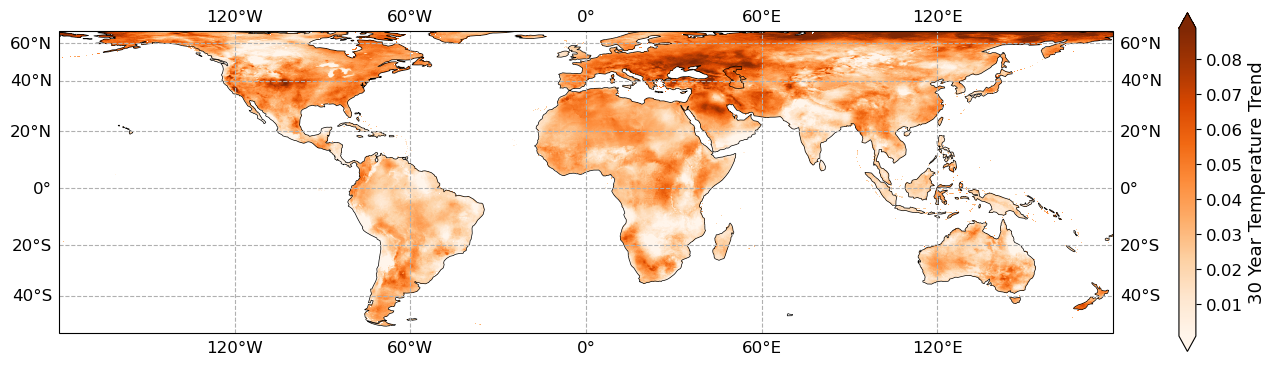

In [213]:
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import xarray as xr
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Data = xr.open_dataset('Allgrid_Slopes.nc')
# Data = Data.slopes

# cbar_kwargs = {'orientation':'vertical', 'shrink':0.55,'label': '30 Year Temperature Trend'}
# fig = plt.figure(figsize=(17, 8))
# ax = plt.subplot(1, 1, 1, projection=ccrs.LambertCylindrical())
# img = Data.plot(ax=ax, cmap = 'Oranges', transform=ccrs.PlateCarree(), add_colorbar=True, robust = True, cbar_kwargs = cbar_kwargs)

# ax.coastlines(linewidth=0.5)

# cbar = img.colorbar

# # To increase the font size of the colorbar's label
# cbar.set_label('30 Year Temperature Trend', size=13)  # Adjust size as needed

# # To increase the font size of the colorbar's tick labels
# cbar.ax.tick_params(labelsize=12) 

# # Overlay shapefile boundaries
# # shdf1.boundary.plot(ax=ax, color='black', linewidth=0.3)

# # Add gridlines
# gl = ax.gridlines(draw_labels=True, linestyle='--')
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# gl.xlabel_style = {'size': 12}
# gl.ylabel_style = {'size': 12}

# # Add title and labels
# # plt.title('Average Annual Temperature Trend in Ecoregions')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

# # plt.colorbar(img, ax=ax).remove()
# # cbar = fig.colorbar(img, ax=ax, orientation='vertical', shrink=0.5)

# # Show the plot
# plt.savefig('All_Slopes_EA2.png', format="png", dpi=400, bbox_inches='tight')
# plt.show()

## All Regions

In [21]:
# Diff2

<xarray.DataArray (latitude: 2600, longitude: 7200)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 69.98 69.93 69.88 ... -59.87 -59.92 -59.97
  * longitude  (longitude) float64 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0

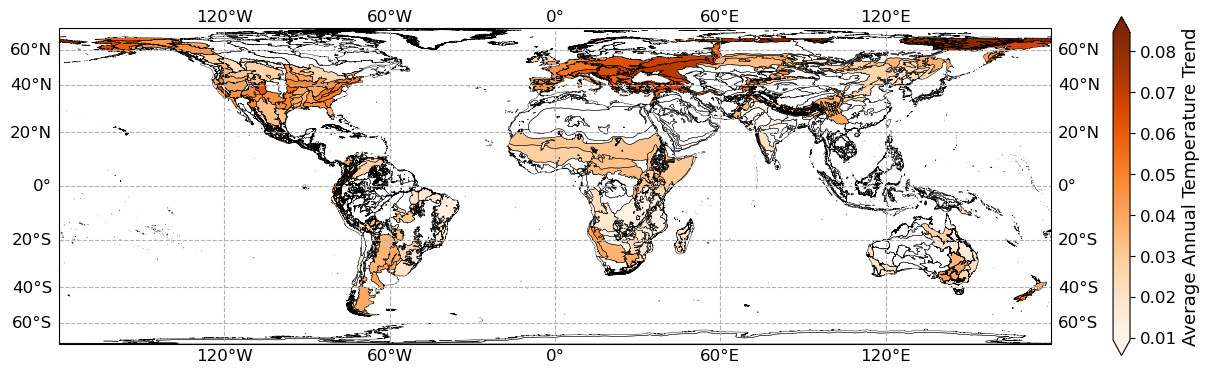

In [223]:
# cbar_kwargs = {'orientation':'vertical', 'shrink':0.4, 'label': 'Average Annual Temperature Trend'}
# fig = plt.figure(figsize=(16, 11))
# ax = plt.subplot(1, 1, 1, projection=ccrs.LambertCylindrical())
# img = Diff.plot(ax=ax, cmap = 'Oranges', transform=ccrs.PlateCarree(), add_colorbar=True, robust = True, cbar_kwargs = cbar_kwargs)

# # Overlay shapefile boundaries
# shdf1.boundary.plot(ax=ax, transform=ccrs.PlateCarree(), color='black', linewidth=0.3)

# cbar = img.colorbar

# # To increase the font size of the colorbar's label
# cbar.set_label('Average Annual Temperature Trend', size=13)  # Adjust size as needed

# # To increase the font size of the colorbar's tick labels
# cbar.ax.tick_params(labelsize=12) 


# # Add gridlines
# gl = ax.gridlines(draw_labels=True, linestyle='--')
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# gl.xlabel_style = {'size': 12}
# gl.ylabel_style = {'size': 12}

# # Add title and labels
# # plt.title('Average Annual Temperature Trend in Ecoregions')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

# # plt.colorbar(img, ax=ax).remove()
# # cbar = fig.colorbar(img, ax=ax, orientation='vertical', shrink=0.5)

# # Show the plot
# plt.savefig('All_Regions_EA2.png', format="png", dpi=400, bbox_inches='tight')
# plt.show()

In [10]:
# def final_plot(num):
# # temp = 0
# # for i in [Greenup, Maturity, Senescence, Dormancy]:

# # Forest = All_Seasons[:]
# # Difference = All_Seasons[:]
# # Grass = All_Seasons[:]
#     L = [Greenup, Maturity, Senescence, Dormancy, Annual]
#     i = L[num]
# # for i in [Greenup, Maturity, Senescence, Dormancy, Annual]:
# # for i in [Up, Down]:
    
#     Diff = xr.open_dataarray('aridity_new.nc')
#     For = xr.open_dataarray('aridity_new.nc')
#     Gra = xr.open_dataarray('aridity_new.nc')
#     # test_data = test_data
#     Diff.data[Diff.data < 1000000] = np.nan
#     For.data[For.data < 1000000] = np.nan
#     Gra.data[Gra.data < 1000000] = np.nan

#     for j in range(len(i)):
#         try:
#             Code = i.loc[j, 'Name']
#         except:
#             continue
#         Code = Code[4:10]

#         loc = shdf1.loc[shdf1['ECO_CODE'] == Code]

#         Pol = loc.iloc[0].geometry
#         poly = regionmask.Regions([Pol])

#         mask = poly.mask(Diff, lat_name = 'latitude', lon_name = 'longitude')

#         Diff.data[mask == 0] = i.loc[j, 'Diff']
#         For.data[mask == 0] = i.loc[j, 'forest']
#         Gra.data[mask == 0] = i.loc[j, 'grass']
        
    
#     Difference[temp] = Diff.rename('Forest Slope - Grass Slope')
#     Forest[temp] = For.rename('Forest Slope - Grass Slope')
#     Grass[temp] = Gra.rename('Forest Slope - Grass Slope')
#     # # return test_data
#     # if temp == 0:
#     #     # Up = test_data.rename('Grass Slope - Forest Slope')
#     #     SPRI = Diff.rename('Forest Slope - Grass Slope')
#     #     SPRI1 = For.rename('Forest Slope - Grass Slope')
#     #     SPRI2 = Gra.rename('Forest Slope - Grass Slope')
#     # elif temp == 1:
#     #     # Down = test_data.rename('Grass Slope - Forest Slope')
#     #     SUMM = Diff.rename('Forest Slope - Grass Slope')
#     #     SUMM1 = For.rename('Forest Slope - Grass Slope')
#     #     SUMM2 = Gra.rename('Forest Slope - Grass Slope')
#     # elif temp == 2:
#     #     FAL = Diff.rename('Forest Slope - Grass Slope')
#     #     FAL1 = For.rename('Forest Slope - Grass Slope')
#     #     FAL2 = Gra.rename('Forest Slope - Grass Slope')
#     # elif temp == 3:
#     #     WIN = Diff.rename('Forest Slope - Grass Slope')
#     #     WIN1 = For.rename('Forest Slope - Grass Slope')
#     #     WIN2 = Gra.rename('Forest Slope - Grass Slope')
#     # else:
#     #     ANN = Diff.rename('Forest Slope - Grass Slope')
#     #     SPRI = For.rename('Forest Slope - Grass Slope')
#     #     SPRI = Gra.rename('Forest Slope - Grass Slope')
#     temp = temp + 1
#     print(temp)
# # All_Seasons_Diff =  xr.concat([SPRI, SUMM, FAL, WIN, ANN], pd.Index(['Greenup', 'Maturity', 'Senescence', 'Dormancy', 'Annual'], name='Growing Stage'))
# # All_Seasons_For =  xr.concat([SPRI1, SUMM1, FAL1, WIN1, ANN1], pd.Index(['Greenup', 'Maturity', 'Senescence', 'Dormancy', 'Annual'], name='Growing Stage'))
# # All_Seasons_Gra =  xr.concat([SPRI2, SUMM2, FAL2, WIN2, ANN2], pd.Index(['Greenup', 'Maturity', 'Senescence', 'Dormancy', 'Annual'], name='Growing Stage'))

In [11]:
# %%time
# import multiprocess as mp

# if __name__ == '__main__':
#     with mp.Pool(mp.cpu_count()) as p:
#         results = p.map(final_plot, [0,1,2,3,4,5,6,7])

In [12]:
# four_seasons = Difference[0:4].plot(x='longitude', y='latitude', col='Growing Stage', col_wrap=2, robust = True)


In [13]:
# All_Seasons[4].plot(cmap = 'magma')

In [14]:
# sns.displot(np.ravel(All_Seasons[3]))

In [15]:
# All_Seasons.data[All_Seasons.data > 4] = np.nan
# All_Seasons.data[All_Seasons.data < 4] = np.nan

In [16]:
# len(All_Seasons.latitude)

In [17]:
# Gr = []
# Ma = []
# Se = []
# Do = []
# for i in range(len(Difference.latitude)):
#     Gr.append(np.nanmean(Difference[0][i][:]))
#     Ma.append(np.nanmean(Difference[1][i][:]))
#     Se.append(np.nanmean(Difference[2][i][:]))
#     Do.append(np.nanmean(Difference[3][i][:]))